In [1]:
import pandas as pd
import os 
import glob 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
path_filtered = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/commit_v3_TEST_merged3_372a147_medium_run_conf2_annotFrame_cap0_runs/TCGA_Breast_1102/filter_TCGA-BH-A18V-01A-11R-A12D-07.all/commit_372a147_full_flags_GTEXcore/G_TCGA-BH-A18V-01A-11R-A12D-07.all_ref_SampleLim0.0CohortLim0.0Across1_FiltNormalsGtexcoreCohortlim0.0Across0.tsv/part-00000-c554ddd4-74fd-4040-8c55-fb27edde84cc-c000.csv'

In [3]:
path_cancer = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/commit_v3_TEST_merged3_372a147_medium_run_conf2_annotFrame_cap0_runs/TCGA_Breast_1102/filter_TCGA-BH-A18V-01A-11R-A12D-07.all/commit_372a147_full_flags_a_interm_cancer/interm_cancer_ref_combiExprCohortLim0.0Across1ExceptTCGABHA18V01A11RA12D07all.tsv/'

In [10]:
path_cancers = glob.glob(path_cancer + '*part*')

In [25]:
cancers = [pd.read_csv(path, sep = '\t', header = None) for path in path_cancers ]

cancers = pd.concat(cancers, axis = 0).rename( {0:'kmer', 1:'recurrence'}, axis = 1)

In [26]:
cancers.head()

,kmer,recurrence
0,QVPTSPVPG,47
1,NNNCPDRLP,109
2,PQVPGPPCA,29
3,RHLYQGCQD,1
4,QQIKEEESD,82


In [6]:
filtered = pd.read_csv(path_filtered, sep = '\t')

In [7]:
filtered.head()

,kmer,TCGABHA18V01A11RA12D07all,junctionAnnotated,readFrameAnnotated
0,DINLNSPVD,1.0,1.0,1.0
1,PSHLLKRSR,7050.0,1.0,1.0
2,SALMQVHVT,28.0,1.0,1.0
3,WVWSEKSNL,79.0,1.0,1.0
4,LVCGLFHQQ,145.0,1.0,1.0


In [27]:
df = filtered.merge(cancers, on = 'kmer', how = 'left')

In [28]:
df.head()

,kmer,TCGABHA18V01A11RA12D07all,junctionAnnotated,readFrameAnnotated,recurrence
0,DINLNSPVD,1.0,1.0,1.0,26
1,PSHLLKRSR,7050.0,1.0,1.0,1101
2,SALMQVHVT,28.0,1.0,1.0,1089
3,WVWSEKSNL,79.0,1.0,1.0,1099
4,LVCGLFHQQ,145.0,1.0,1.0,1101


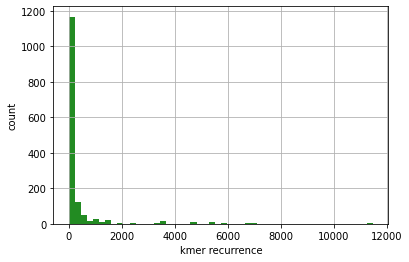

In [62]:
plt.hist(filtered['TCGABHA18V01A11RA12D07all'], bins = 50, color = 'forestgreen')
plt.ylabel('count')
plt.xlabel('kmer recurrence')
plt.grid()

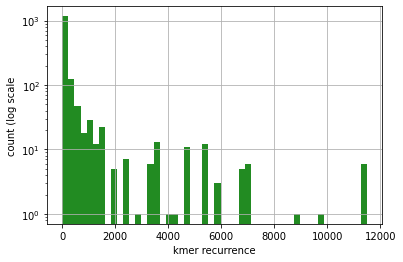

In [63]:
plt.hist(filtered['TCGABHA18V01A11RA12D07all'], bins = 50,  color = 'forestgreen')
plt.yscale('log')
plt.ylabel('count (log scale')
plt.xlabel('kmer recurrence')
plt.grid()

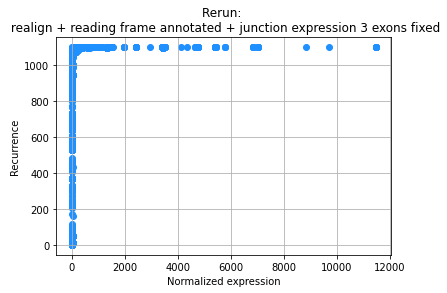

In [64]:
plt.scatter(df['TCGABHA18V01A11RA12D07all'], df['recurrence'], 
           color = 'dodgerblue')
plt.title('Rerun: \n realign + reading frame annotated + junction expression 3 exons fixed')
plt.ylabel('Recurrence')
plt.xlabel('Normalized expression')
plt.grid()

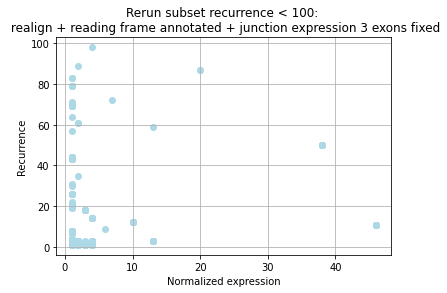

In [65]:
df_plot = df.loc[df['recurrence'] < 100, :]
plt.scatter(df_plot['TCGABHA18V01A11RA12D07all'],
            df_plot['recurrence'], 
            color = 'lightblue')
plt.title('Rerun subset recurrence < 100: \n realign + reading frame annotated + junction expression 3 exons fixed')
plt.ylabel('Recurrence')
plt.xlabel('Normalized expression')
plt.grid()

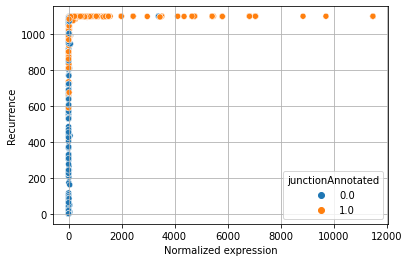

In [73]:

sns.scatterplot(data = df, 
                x = 'TCGABHA18V01A11RA12D07all', 
               y = 'recurrence', 
               hue = 'junctionAnnotated')
plt.ylabel('Recurrence')
plt.xlabel('Normalized expression')
plt.grid()

In [80]:
df_plot = df.loc[(df['recurrence'] > 100) &
                 (df['TCGABHA18V01A11RA12D07all'] > 10), :]
df_plot.shape
df_plot.to_csv('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/commit_v3_TEST_merged3_372a147_medium_run_conf2_annotFrame_cap0_runs/TCGA_Breast_1102/filter_TCGA-BH-A18V-01A-11R-A12D-07.all/commit_372a147_full_flags_GTEXcore/recurrence>100_expression>10.tsv', sep = '\t')

In [82]:
df_plot.head(20)

,kmer,TCGABHA18V01A11RA12D07all,junctionAnnotated,readFrameAnnotated,recurrence
1,PSHLLKRSR,7050.0,1.0,1.0,1101
2,SALMQVHVT,28.0,1.0,1.0,1089
3,WVWSEKSNL,79.0,1.0,1.0,1099
4,LVCGLFHQQ,145.0,1.0,1.0,1101
6,RWLCLPRQE,344.0,1.0,1.0,1101
7,WSGQRVSGS,98.0,1.0,1.0,1101
8,EDDPFFYGG,12.0,0.0,1.0,695
10,PGHPQGAAV,84.0,1.0,1.0,1098
13,SNLYWLVMV,711.0,1.0,1.0,1101
15,DLRKYCGQC,743.0,1.0,1.0,1101
